# 基于模板

## 微信

In [42]:
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]
mpl.rcParams["axes.unicode_minus"]=False
from selenium import webdriver
from  time import sleep
import pandas as pd
import json
from  random import random
import re
from lxml import etree
from lxml import etree
import time


In [2]:
df = pd.read_csv('./baseline_extractor_AllChineseText.csv')

In [5]:
df['url']

0      https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA
1      http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf8972...
2                 http://m.ha.bendibao.com/mip/1636.shtm
3      http://news.gxnews.com.cn/staticpages/20200209...
4      http://o.xiancity.cn/system/2020/02/09/0307133...
                             ...                        
188    https://weibo.com/7129811001/ItKAzr93p?from=pa...
189    https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
190    https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
191    https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
192    https://www.tibet3.com/news/zangqu/qh/2020-02-...
Name: url, Length: 193, dtype: object

In [14]:
# weixin = {'weixin_url':[]}
# weixin = pd.DataFrame(weixin)
# weixin['weixin_url'] = df['url']

In [15]:
weixin

,weixin_url


In [18]:
weixin = {'weixin_url':[]}

for u in df['url']:
    if 'weixin' in u:
        weixin['weixin_url'].append(u)
weixin = pd.DataFrame(weixin)
weixin

,weixin_url
0,https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA
1,https://mp.weixin.qq.com/s/03w_HdZGypbtAG33jikquw
2,https://mp.weixin.qq.com/s/0xihh12dgBBxbfozR6fnNg
3,https://mp.weixin.qq.com/s/0zzx4G3oUPQmzNk6JTTUzQ
4,https://mp.weixin.qq.com/s/15bQoiHzj8ABrnySvnEtQA
...,...
149,https://mp.weixin.qq.com/s/yq4IcgXi4vxQxO3UBYOZ-A
150,https://mp.weixin.qq.com/s/yT_I4r6Sc2K3O7-3iAl-mA
151,https://mp.weixin.qq.com/s/yyeefgne4StL6ZH9mRh80Q
152,https://mp.weixin.qq.com/s/z1mVzAvyEoNiS2s0jsIgQw


In [43]:
u='https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA'
time_start=time.time()
r = requests.get(u)
r.encoding= r.apparent_encoding
# selector=etree.HTML(r.text) # 将源码转化为能被XPath匹配的格式
# ret=selector.xpath("//*[@id='js_name']")
pa = r"(?<=\"js_name\">\n).+?(?=</a>)"
res = re.search(pa,r.text).group(0)
resouce = res.strip()
resouce
time_end=time.time()
print('time cost',time_end-time_start,'s')


time cost 2.6196858882904053 s


'<!DOCTYPE html>\n<html class="\n\n">\n    <head>\n                        <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="color-scheme" content="light dark">\n<meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=1.0,user-scalable=0,viewport-fit=cover">\n<link rel="shortcut icon" type="image/x-icon" href="//res.wx.qq.com/a/wx_fed/assets/res/NTI4MWU5.ico">\n<link rel="mask-icon" href="//res.wx.qq.com/a/wx_fed/assets/res/MjliNWVm.svg" color="#4C4C4C">\n<link rel="apple-touch-icon-precomposed" href="//res.wx.qq.com/a/wx_fed/assets/res/OTE0YTAw.png">\n<meta name="apple-mobile-web-app-capable" content="yes">\n<meta name="apple-mobile-web-app-status-bar-style" content="black">\n<meta name="format-detection" content="telephone=no">\n\n\n        \n\n  \n  <meta name="description" content="最新疫情通报" />\n  <meta name="author" content="" />\n\n  \n  <meta property="og:title" content=
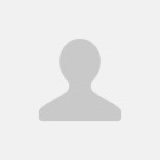
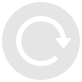
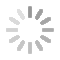
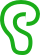
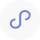
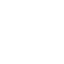
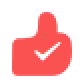
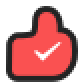
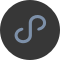

In [40]:
r.text

In [45]:
resouces = []
# 抓来源
for u in weixin['weixin_url']:
# #     u='https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA'
    print(u)
#     r = requests.get(u)
#     r.encoding= r.apparent_encoding
#     selector=etree.HTML(r.text) # 将源码转化为能被XPath匹配的格式
#     ret=selector.xpath("//*[@id='js_name']")
#     resouce = ret[0].text.strip()
#     resouces.append(resouce)

#     u='https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA'
#     time_start=time.time()
    r = requests.get(u)
    r.encoding= r.apparent_encoding
    # selector=etree.HTML(r.text) # 将源码转化为能被XPath匹配的格式
    # ret=selector.xpath("//*[@id='js_name']")
    pa = r"(?<=\"js_name\">\n).+?(?=</a>)"
    if re.search(pa,r.text) is not None:
        res = re.search(pa,r.text).group(0)
        resouce = res.strip()
        resouces.append(resouce)
    else:
        resouces.append('unknow')
#     resouce
#     time_end=time.time()
#     print('time cost',time_end-time_start,'s')


https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA
https://mp.weixin.qq.com/s/03w_HdZGypbtAG33jikquw
https://mp.weixin.qq.com/s/0xihh12dgBBxbfozR6fnNg
https://mp.weixin.qq.com/s/0zzx4G3oUPQmzNk6JTTUzQ
https://mp.weixin.qq.com/s/15bQoiHzj8ABrnySvnEtQA
https://mp.weixin.qq.com/s/16ICfUi-Z2UMbbckkm0Xpw
https://mp.weixin.qq.com/s/1gv6bdr4kVBq4nUYOMqJHg
https://mp.weixin.qq.com/s/1l-RCQ_OfAMhOZZSmo2sDw
https://mp.weixin.qq.com/s/21pwvOkvunpCGf0F8UGsKQ
https://mp.weixin.qq.com/s/22zfhtcc5aqqWpt0anCVOQ
https://mp.weixin.qq.com/s/23fOSN0X3dT99e22m34Few
https://mp.weixin.qq.com/s/2COYPOACgINLbVZGLJ20pw
https://mp.weixin.qq.com/s/2HRalKs46VxIkbLMBBGbCA
https://mp.weixin.qq.com/s/2J9_3bKsljNLeVmFqY4rxQ
https://mp.weixin.qq.com/s/2ri05eGgAq5QHorGkz07sw
https://mp.weixin.qq.com/s/3_ru000m-BsCB3uAjbohAg
https://mp.weixin.qq.com/s/39apxV_xQLEu0MJ5ToE__g
https://mp.weixin.qq.com/s/3GBAMxcOz-brFl_7_soiXg
https://mp.weixin.qq.com/s/40KCQ1yZszq1b5OMNsRctg
https://mp.weixin.qq.com/s/4JrjMJc7lPDCFHXY3LFSeQ


In [46]:
weixin['resources'] = resouces

In [50]:
weixin

,weixin_url,resources
0,https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA,健康肇庆
1,https://mp.weixin.qq.com/s/03w_HdZGypbtAG33jikquw,中山发布
2,https://mp.weixin.qq.com/s/0xihh12dgBBxbfozR6fnNg,中山发布
3,https://mp.weixin.qq.com/s/0zzx4G3oUPQmzNk6JTTUzQ,辽沈晚报
4,https://mp.weixin.qq.com/s/15bQoiHzj8ABrnySvnEtQA,咸阳发布
...,...,...
149,https://mp.weixin.qq.com/s/yq4IcgXi4vxQxO3UBYOZ-A,惠州发布
150,https://mp.weixin.qq.com/s/yT_I4r6Sc2K3O7-3iAl-mA,巴彦淖尔日报
151,https://mp.weixin.qq.com/s/yyeefgne4StL6ZH9mRh80Q,江西日报
152,https://mp.weixin.qq.com/s/z1mVzAvyEoNiS2s0jsIgQw,江门发布


In [51]:
weixin.to_csv('weixin_resources.csv')

# 政府gov

In [ ]:
df['url']

In [49]:
gov = {'gov_url':[]}

for u in df['url']:
    if 'gov' in u:
        gov['gov_url'].append(u)
gov = pd.DataFrame(gov)
gov

,gov_url
0,http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf8972...
1,http://sxwjw.shaanxi.gov.cn/art/2020/2/13/art_...
2,http://sxwjw.shaanxi.gov.cn/art/2020/2/3/art_9...
3,http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/conten...
4,http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/conten...
5,http://wjw.nmg.gov.cn/doc/2020/02/01/286091.shtml
6,http://wjw.nmg.gov.cn/doc/2020/02/02/286191.shtml
7,http://wjw.nmg.gov.cn/doc/2020/02/09/291226.shtml
8,http://wjw.shanxi.gov.cn/wjywl02/24757.hrh
9,http://wjw.shanxi.gov.cn/wjywl02/24774.hrh


In [154]:
u='http://sxwjw.shaanxi.gov.cn/art/2020/2/13/art_9_67993.html'
# time_start=time.time()

# r = requests.get(u)
# r.encoding= r.apparent_encoding

driver.get(u)
r = driver.page_source

pa = r"http://bszs.conac.cn/sitename\?method=show&amp;id=.+?\""

site = re.search(pa,r).group(0)[:-1].replace('amp;','')

driver.get(site)
r = driver.page_source

# <meta name="SiteName" content="广州市卫生健康委员会网站">




http://bszs.conac.cn/sitename?method=show&id=0B3DC30C414C1A6CE053012819AC1BE9


In [185]:
for u in gov['gov_url']:
# u = 'http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5648584.html'
#     driver.get(u)
#     r = driver.page_source
    print(u)
    try:
        r = requests.get(u,timeout=5)
    except requests.exceptions.ConnectionError as e:
        print("连接超时")
        continue
    
    if r.status_code == requests.codes.ok:
        r.encoding= r.apparent_encoding
        r = r.text
        p = []
        p.append(r"(?<=<meta name=\"SiteName\" content=\").+?(?=\">)")
        p.append(r"(?<=<meta name=\"ContentSource\" content=\").+?(?=\")")
        name = 'unknow'
        for pi in p:
            if re.search(pi,r) is not None:
                name  = re.search(pi,r).group(0)
                break
        print(name)
#         name = re.search(pa_1,r).group(0) if re.search(pa_1,r) is not None else 'unknow'
#         print(name)
    else:
        print(r.status_code)
        



http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf89720dbf4968850892328059db4c.shtml
南昌市卫生健康委员会
http://sxwjw.shaanxi.gov.cn/art/2020/2/13/art_9_67993.html
unknow
http://sxwjw.shaanxi.gov.cn/art/2020/2/3/art_9_67666.html
unknow
http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5648584.html
广州市卫生健康委员会网站
http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5662091.html
广州市卫生健康委员会网站
http://wjw.nmg.gov.cn/doc/2020/02/01/286091.shtml
unknow
http://wjw.nmg.gov.cn/doc/2020/02/02/286191.shtml
unknow
http://wjw.nmg.gov.cn/doc/2020/02/09/291226.shtml
unknow
http://wjw.shanxi.gov.cn/wjywl02/24757.hrh
unknow
http://wjw.shanxi.gov.cn/wjywl02/24774.hrh
unknow
http://wjw.sz.gov.cn/yqxx/202002/t20200209_19006168.htm
unknow
http://wjw.taiyuan.gov.cn/doc/2020/02/07/955867.shtml
太原市卫生健康委员会
http://wjw.taiyuan.gov.cn/doc/2020/02/08/955916.shtml
太原市卫生健康委员会
http://wsjkw.sh.gov.cn/xwfb/20200208/f3882592b1144b558a13a5a9c4ac4a9f.html
上海市卫生健康委员会
http://www.wuzhong.gov.cn/sy/gsgg/202002/t20200206_1943703.html
404
http:

In [253]:
# u = 'http://wjw.taiyuan.gov.cn/doc/2020/02/08/955916.shtml'
# u = 'http://wjw.sz.gov.cn/yqxx/202002/t20200209_19006168.htm'
hit = ['SiteName','ContentSource','source']
p = []
for u in gov['gov_url']:
    print('==========')
    print(u)
    try:
        r = requests.get(u,timeout=5)
    except requests.exceptions.ConnectionError as e:
        print("连接超时")
        continue
    
    flag = False
    if r.status_code == requests.codes.ok:
        r.encoding= r.apparent_encoding
        r = r.text
        soup = BeautifulSoup(r,'lxml')
        for i in soup.select('meta'):
            d = i.attrs
            if 'name' in d:
                if d['name'] in hit:
                    print(d['content'])
                    flag = True
                    break
    else:
        print(r.status_code)
        continue
        
    if flag is False:
        r = requests.get(u,timeout=5)
        r.encoding= r.apparent_encoding
        p = r"来源：[^\u4e00-\u9fff]*[\u4e00-\u9fff]+"
        res = re.search(p,r.text)
        if res is not None:
            result = re.findall(r"[\u4e00-\u9fff]+",res.group(0)[3:])[0]
            print(result)
        else:
            print('unknow')
    print('==========')

http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf89720dbf4968850892328059db4c.shtml
南昌市卫生健康委员会
http://sxwjw.shaanxi.gov.cn/art/2020/2/13/art_9_67993.html
省卫生健康委
http://sxwjw.shaanxi.gov.cn/art/2020/2/3/art_9_67666.html
省卫生健康委
http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5648584.html
广州市卫生健康委员会网站
http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5662091.html
广州市卫生健康委员会网站
http://wjw.nmg.gov.cn/doc/2020/02/01/286091.shtml
呼和浩特日报
http://wjw.nmg.gov.cn/doc/2020/02/02/286191.shtml
达拉特旗新型冠状病毒感染的肺炎疫情防控指挥部
http://wjw.nmg.gov.cn/doc/2020/02/09/291226.shtml
霍林郭勒市新型冠状病毒感染肺炎防控工作指挥部
http://wjw.shanxi.gov.cn/wjywl02/24757.hrh
403
http://wjw.shanxi.gov.cn/wjywl02/24774.hrh
403
http://wjw.sz.gov.cn/yqxx/202002/t20200209_19006168.htm
深圳市卫生健康委员会
http://wjw.taiyuan.gov.cn/doc/2020/02/07/955867.shtml
太原市卫生健康委员会网站
http://wjw.taiyuan.gov.cn/doc/2020/02/08/955916.shtml
太原市卫生健康委员会网站
http://wsjkw.sh.gov.cn/xwfb/20200208/f3882592b1144b558a13a5a9c4ac4a9f.html
上海市卫生健康委员会
http://www.wuzhong.gov.cn/sy/gsgg/20200

In [250]:
# u = 'http://wjw.nmg.gov.cn/doc/2020/02/01/286091.shtml'
u = 'http://wjw.nmg.gov.cn/doc/2020/02/09/291226.shtml'
r = requests.get(u)
r.encoding= r.apparent_encoding
# p = r"来源：[^\w\u4e00-\u9fff]*[\u4e00-\u9fff]+"
p = r"来源：[^\u4e00-\u9fff]*[\u4e00-\u9fff]+"
res = re.search(p,r.text)
# res.group(0)[3:]
res

<re.Match object; span=(2640, 2670), match='来源：</b>\n霍林郭勒市新型冠状病毒感染肺炎防控工作指挥部'>

In [247]:
r.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml"><head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=EmulateIE8">\n<title>内蒙古自治区卫生健康委员会-紧急扩散-关于确诊病例徐某芬行动轨迹的公告</title>\n<meta name="keywords" content="关键词,关键词">\n\t<meta name="description" content="网站主要介绍（尽量简短）">\n    <meta name="viewport" content="width=device-width">\n<link href="/css/xsd_zlm_index.css" type="text/css" rel="stylesheet">\n<link href="/css/w_font.css" type="text/css" rel="stylesheet">\n<link rel="stylesheet" href="/css/global.css">\n<link rel="stylesheet" href="/css/project.css">\n<link rel="stylesheet" href="/css/zlm_fy.css">\n<link rel="stylesheet" href="/css/xsd_hf.css" type="text/css">\n<link href="/css/SJHreset.css" type="text/css" rel="stylesheet" />\n<link href="/css/hf.css" type="text/css" rel="stylesheet" />\n<link href="/css/m

In [94]:
u='http://sxwjw.shaanxi.gov.cn/art/2020/2/13/art_9_67993.html'
time_start=time.time()
r = requests.get(u)
r.encoding= r.apparent_encoding

soup = BeautifulSoup(r.text, features="html.parser")
for script in soup(["script", "style"]):
    script.decompose()
text = soup.get_text()
    
# selector=etree.HTML(r.text) # 将源码转化为能被XPath匹配的格式
# ret=selector.xpath("//*[@id='js_name']")
# <meta name="SiteName" content="南昌市卫生健康委员会">
# html=etree.HTML(r.text)
# res = html.xpath('/html/head/meta[5]')
pa_1 = r"(?<=来源：).+?(?=\n)"


if re.search(pa_1,r.text) is not None:
    res = re.search(pa_1,r.text).group(0)
else:
    res = 'unknow'
resouc = res.strip()
resouc
time_end=time.time()
print('time cost',time_end-time_start,'s')


time cost 0.10161900520324707 s


In [95]:
text

'\n\n\n\n\n\n\n\n\n\n\n陕西省卫生健康委员会 卫健要闻 陕西新增4例新冠肺炎 确诊病例累计229例\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\x00\r\n\n\n\n\n\n\n\n当前位置：\n首页\n\n\n>新闻动态>卫健要闻\n\n\n\n\n\n\n\n\n\n\n\n陕西新增4例新冠肺炎 确诊病例累计229例\n\n\n\n来源：省卫生健康委发布时间：2020-02-13  10:01字体：【 大 中 小 】\n\n\n\n\n截至2月13日10时，陕西新增4例新冠肺炎确诊病例，新增疑似病例53例。新增确诊病例中，西安市4例。陕西累计报告新冠肺炎确诊病例229例（42例治愈出院），其中输入性病例115例，密切接触者100例，无明确接触史病例14例。累计确诊病例中，西安市114例、宝鸡市13例、咸阳市17例、铜川市8例、渭南市14例、延安市8例、榆林市3例、汉中市21例、安康市22例、商洛市7例、杨凌示范区1例，韩城市1例。全省现有疑似病例304例。全省新增密切接触者829人，累计13562人，均集中医学观察。新增解除密切接触者590人，累计解除密切接触者7498人。患者1，男，58岁，现居西安市高新区。1月19日从上海市到西安市，2月2日出现症状，自行服药效果不佳。2月7日症状加重到西安高新医院就诊，2月8日被转至西安市胸科医院。2月13日被诊断为新冠肺炎。目前在西安市胸科医院隔离治疗。患者2，男，50岁，现居西安市新城区，所居单元楼有确诊患者（2月2日确诊患者13）。1月9日从浙江省温州市到西安市，1月10日至1月14日在多彩商城有工作经历，1月28日出现症状，2月2日所居单元楼被隔离，当天被转至华山医院就诊，当晚被转至西安市胸科医院就诊。2月13日被诊断为新冠肺炎。目前在西安市胸科医院隔离治疗。患者3，男，89岁，现居西安市雁塔区，与2月8日确诊患者8有密切接触史。2月9日出现症状，2月10日到西安交通大学第一附属医院就诊，被隔离治疗。2月13日被诊断为新冠肺炎。目前在西安交通大学第一附属医院隔离治疗。患者4，女，81岁，现居西安市碑林区，与2月8日确诊患者7有密切接触史。2月5日被隔离观察，2月6日出现厌食症状，2月11日被转至陕西省人民医院就诊。2月13日被诊断为新冠肺炎。

In [143]:
import sys
text_ = []

for u in gov['gov_url']:
    print(u)
    r = requests.get(u)
    r.encoding= r.apparent_encoding

    soup = BeautifulSoup(r.text, features="html.parser")
    for script in soup(["script", "style"]):
        script.decompose()
    text = soup.get_text()
    text_.append(text)
    
    
for i in text_:
    sleep(0.2)
    sys.stdout.write('\r' + str(i))
    sys.stdout.flush()

http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf89720dbf4968850892328059db4c.shtml
http://sxwjw.shaanxi.gov.cn/art/2020/2/13/art_9_67993.html
http://sxwjw.shaanxi.gov.cn/art/2020/2/3/art_9_67666.html
http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5648584.html
http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5662091.html
http://wjw.nmg.gov.cn/doc/2020/02/01/286091.shtml
http://wjw.nmg.gov.cn/doc/2020/02/02/286191.shtml
http://wjw.nmg.gov.cn/doc/2020/02/09/291226.shtml
http://wjw.shanxi.gov.cn/wjywl02/24757.hrh
http://wjw.shanxi.gov.cn/wjywl02/24774.hrh
http://wjw.sz.gov.cn/yqxx/202002/t20200209_19006168.htm
http://wjw.taiyuan.gov.cn/doc/2020/02/07/955867.shtml
http://wjw.taiyuan.gov.cn/doc/2020/02/08/955916.shtml
http://wsjkw.sh.gov.cn/xwfb/20200208/f3882592b1144b558a13a5a9c4ac4a9f.html
http://www.wuzhong.gov.cn/sy/gsgg/202002/t20200206_1943703.html
http://www.wuzhong.gov.cn/sy/gsgg/202002/t20200207_1945035.html
http://www.wuzhong.gov.cn/ztzl/ztlb/kjyq/202001/t20200130_1936123.html






内蒙古自治区卫生健康委员会-紧急扩散-紧急扩散！呼和浩特急寻与这两名患者同乘交通工具人员及接触者

































首页 > 专题栏目 > 当前专题 > 新型冠状病毒感染的肺炎疫情防控 > 紧急扩散


紧急扩散


紧急扩散！呼和浩特急寻与这两名患者同乘交通工具人员及接触者

发布日期：2020-02-01 13:46:05　|　
						文章来源：
呼和浩特日报　|　浏览次数：次


　　关于急寻与患者同乘交通工具人员及接触者的协查通告
　　广大市民朋友：
　　切实做好疫情防控工作，加强联防联控，关乎您和家人及更多身边群众的身体健康、生命安全，也是每一位公民应尽的责任和义务。据近日通报反馈，宁夏蔡某某、吉林省王某某被确诊为新型冠状病毒感染的肺炎病例。二人1月17日-19日期间在呼和浩特市参加活动。为了准确查找与蔡某某、王某某有接触的人员，现发布如下通告：
　　一、蔡某某行程轨迹
　　蔡某某，户籍地：宁夏回族自治区吴忠市同心县，1月29日被确诊为新型冠状病毒感染的肺炎病例。
　　（一）1月17日
　　22:04-23:05，从萨拉齐乘坐T4202次（2车厢、9座位号）火车到达呼市；
　　23:30-18日00:05，乘坐蒙AY0754出租车到赛罕区新建西街百捷酒店管理有限责任公司（锦江之星）酒店入住。
　　（二）1月18日
　　9:30-10:05，从锦江之星酒店乘坐蒙AY1754出租车前往九州通药业有限公司；
　　21:30-21:55，乘坐蒙AY1754出租车到恩和家园居住。
　　（二）1月19日
　　9:30-10:45，步行到凯德MALL商场一楼Nike店、Adidas店购物；
　　10:45-11:30，乘坐蒙AY6679出租车到火车站；
　　11:30-11:35，从第6进站口进站、从第5窗口购票，乘K7925次火车（11号车厢、座位号0084），到包头萨拉齐下车。
　　二、王某某（与蔡某某密切接触人员）行程轨迹
　　王某某，户籍地：吉林省长春市朝阳区，1月29日被确诊为新型冠状病毒感染的肺炎病例。
　　（一）1月16日
　　乘G68动车（2车厢、座位号012D）由武汉到郑州。
　　（二）1月17日
　　22:35-18日00:15，乘坐CA8296航班（座位号21L），由郑州到呼和浩特。
　

























第32号通告 太原市新型冠状病毒感染的肺炎疫情防控工作领导小组办公室通告-太原市卫生健康委员会网站















加入收藏
设为首页
无障碍通道






首  页
机构介绍
新闻中心
公共服务
信息公开
党建工作
政务服务
网上来信








太原市卫生健康委员会








                    政务服务投诉小程序
                






                    扫一扫关注微信
                






                    扫一扫关注微博
                










首页 > 
信息公开
卫计要闻 > 
                第32号通告 太原市新型冠状病毒感染的肺炎疫情防控工作领导小组办公室通告


第32号通告 太原市新型冠状病毒感染的肺炎疫情防控工作领导小组办公室通告
 时间：2020-02-08       
            字号：[ 大 中 小 ]


2020年2月7日0时至24时，太原市新增确诊病例1例（按住址分布在杏花岭区），新增疑似病例10例。截至2月7日24时，太原市累计报告新型冠状病毒感染的肺炎确诊病例12例（按病例首诊医院所在地分布在迎泽区4例、万柏林区4例、杏花岭区3例、小店区1例；按确诊病例住址分布在尖草坪区4例、小店区3例、晋源区2例、杏花岭区2例、晋中市1例），其中治愈出院1例，危重型病例1例，重型病例3例，普通型病例7例。现收治疑似病例17例。累计追踪到密切接触者507人，已解除医学观察410人。
新增确诊病例活动轨迹：男，现住址为杏花岭区胜利东街晋安3号院。患者妹妹、妹夫及外孙三人于2020年1月20日由武汉乘坐G692次高铁（1车厢8A、8C座）16:30到达太原，先乘坐公交车（自述记不清公交车号），后乘坐出租车（自述记不清出租车牌号）来到患者家中，至1月28日离开，自述期间没有外出。患者妹妹、妹夫及外孙三人离开患者住处后租住在太原市尖草坪区南寨64号楼。患者1月30日下午出现发热，居家服药治疗，2月2日在家中不慎摔跤，2月6日15时左右由120送至太原市中心医院，2月7日转至太原市第四人民医院隔离治疗。
截止2

In [98]:
resouces_gv = []
# 抓来源
for u in gov['gov_url']:
    sleep(1)
    print(u)
    
    r = requests.get(u)
    r.encoding= r.apparent_encoding
    ans = ''
    if r.status_code == requests.codes.ok:
        pa_1 = r"(?<=来源：).+?[^\w\u4e00-\u9fff]+"
        pa_2 = r"(?<=<meta name=\"SiteName\" content=\").+?(?=\">)"
    #     pa_3 = r"(?<=<a href=\"http://bszs.conac.cn/sitename\?method=show&amp;id=).+?(?=\")"
    #     pa_3_5 = r"(?<=<td class=\"grey\">主办单位</td>\n<td>).+?(?=</td>)"
        pa_3 = r"(?<=主办：).+?[^\w\u4e00-\u9fff]+"
        pa_４ = r"(?<=单位:).+?[^\w\u4e00-\u9fff]+"
        name = 'unknow'
        if re.search(pa_1,r.text) is not None:
            name = re.search(pa_1,r.text).group(0)
        elif re.search(pa_2,r.text) is not None:
            name = re.search(pa_2,r.text).group(0)
        elif re.search(pa_3,r.text) is not None:
            name = re.search(pa_3,r.text).group(0)
        elif re.search(pa_４,r.text) is not None:
            name = re.search(pa_４,r.text).group(0)
        if name != 'unknow':
            resouce = name.strip()
            result = re.findall(u'[\u4e00-\u9fa5]',resouce)                                                                               
            ans = ''.join(result)
            resouces_gv.append(ans)
        else:
            ans = 'unknow'
            resouces_gv.append(ans)
    else:
        ans = 'badurl'
        resouces_gv.append(ans)
    
#     resouce
#     time_end=time.time()
#     print('time cost',time_end-time_start,'s')
resouces_gv

http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf89720dbf4968850892328059db4c.shtml
http://sxwjw.shaanxi.gov.cn/art/2020/2/13/art_9_67993.html
http://sxwjw.shaanxi.gov.cn/art/2020/2/3/art_9_67666.html
http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5648584.html
http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5662091.html
http://wjw.nmg.gov.cn/doc/2020/02/01/286091.shtml
http://wjw.nmg.gov.cn/doc/2020/02/02/286191.shtml
http://wjw.nmg.gov.cn/doc/2020/02/09/291226.shtml
http://wjw.shanxi.gov.cn/wjywl02/24757.hrh
http://wjw.shanxi.gov.cn/wjywl02/24774.hrh
http://wjw.sz.gov.cn/yqxx/202002/t20200209_19006168.htm
http://wjw.taiyuan.gov.cn/doc/2020/02/07/955867.shtml
http://wjw.taiyuan.gov.cn/doc/2020/02/08/955916.shtml
http://wsjkw.sh.gov.cn/xwfb/20200208/f3882592b1144b558a13a5a9c4ac4a9f.html
http://www.wuzhong.gov.cn/sy/gsgg/202002/t20200206_1943703.html
http://www.wuzhong.gov.cn/sy/gsgg/202002/t20200207_1945035.html
http://www.wuzhong.gov.cn/ztzl/ztlb/kjyq/202001/t20200130_1936123.html


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'badurl',
 'badurl',
 '深圳市疾控中心',
 'unknow',
 'unknow',
 'unknow',
 'badurl',
 'badurl',
 '',
 'badurl',
 'badurl',
 'badurl']

## 微博

In [159]:
driver = webdriver.Chrome()

In [100]:
weibo = {'weibo_url':[]}

for u in df['url']:
    if 'weibo' in u:
        weibo['weibo_url'].append(u)
weibo = pd.DataFrame(weibo)
weibo

,weibo_url
0,https://m.weibo.cn/2162541102/4469831778965414
1,https://m.weibo.cn/3757167087/4469821893163355
2,https://m.weibo.cn/3757167087/4471457452715962
3,https://m.weibo.cn/3757167087/4471458430201395
4,https://m.weibo.cn/detail/4468614512282405
5,https://weibo.com/7129811001/IrH6peQ3d?from=pa...
6,https://weibo.com/7129811001/IssWHlJzw?from=pa...
7,https://weibo.com/7129811001/ItKAzr93p?from=pa...


In [133]:
u = weibo['weibo_url'][6]
driver.get(u)
sleep(5)
html = driver.page_source

pa_2 = r"(?<=&name=).+?(?=&uid=)"
if re.search(pa_2,r.text) is not None:
    name = re.search(pa_2,html).group(0)


print(name)




西安发布


In [131]:
u='https://m.weibo.cn/3757167087/4471457452715962'
driver.get(u)
sleep(2)
html = driver.page_source

pa_1 = r"(?<=screen_name\": \").+?(?=\")"
pa_2 = r"(?<=&name=).+?(?=&uid=)"
# name = 'unknow' 
# if re.search(pa_1,html) is not None:
#     name = re.search(pa_1,html).group(0)
# elif re.search(pa_2,r.text) is not None:
#     name = re.search(pa_2,html).group(0)
name = re.search(pa_1,html).group(0)

print(name)

西安发布


In [135]:
resouces_wb = []


for u in weibo['weibo_url']:
    print(u)
    driver.get(u)

    pa_1 = r"(?<=screen_name\": \").+?(?=\")"
    pa_2 = r"(?<=&name=).+?(?=&uid=)"
    html = driver.page_source
    
    name = 'unknow'
    if 'm.weibo.cn' in u and re.search(pa_1,html) is not None:
        name = re.search(pa_1,html).group(0)
    elif 'https://weibo.com' in u and re.search(pa_2,html) is not None:
        name = re.search(pa_2,html).group(0)
        
    resouces_wb.append(name)
    


https://m.weibo.cn/2162541102/4469831778965414
https://m.weibo.cn/3757167087/4469821893163355
https://m.weibo.cn/3757167087/4471457452715962
https://m.weibo.cn/3757167087/4471458430201395
https://m.weibo.cn/detail/4468614512282405
https://weibo.com/7129811001/IrH6peQ3d?from=page_1002067129811001_profile&wvr=6&mod=weibotime&type=comment#_rnd1581676880432
https://weibo.com/7129811001/IssWHlJzw?from=page_1002067129811001_profile&wvr=6&mod=weibotime&type=comment
https://weibo.com/7129811001/ItKAzr93p?from=page_1002067129811001_profile&wvr=6&mod=weibotime&type=comment#_rnd1581676145115


In [138]:
resouces_wb

['新浪陕西', '西安发布', '西安发布', '西安发布', '山西青年报', '高陵融媒', '高陵融媒', '高陵融媒']

In [139]:
weibo['resources'] = resouces_wb

In [140]:
weibo

,weibo_url,resources
0,https://m.weibo.cn/2162541102/4469831778965414,新浪陕西
1,https://m.weibo.cn/3757167087/4469821893163355,西安发布
2,https://m.weibo.cn/3757167087/4471457452715962,西安发布
3,https://m.weibo.cn/3757167087/4471458430201395,西安发布
4,https://m.weibo.cn/detail/4468614512282405,山西青年报
5,https://weibo.com/7129811001/IrH6peQ3d?from=pa...,高陵融媒
6,https://weibo.com/7129811001/IssWHlJzw?from=pa...,高陵融媒
7,https://weibo.com/7129811001/ItKAzr93p?from=pa...,高陵融媒


In [141]:
weibo.to_csv('./weibo.csv')

# 自媒体

In [268]:
# 百度百家号　baijiahao.baidu.com

u = 'https://baijiahao.baidu.com/s?id=1658403541897422656&wfr=spider&for=pc'
r = requests.get(u)
r.encoding = r.apparent_encoding
soup = BeautifulSoup(r.text,'lxml') 
res = soup.find('p',class_='author-name')
res.text


'中国新闻网'

In [271]:
# 南方都市报　m.mp.oeeee.com
u = 'https://m.mp.oeeee.com/a/BAAFRD000020200203257514.html?layer=4&share=chat&isndappinstalled=12'
r = requests.get(u)
r.encoding = r.apparent_encoding
soup = BeautifulSoup(r.text,'lxml') 
res = soup.find('span',class_='name avatar_click')
res.text

'南方都市报 • 南都江门'

In [272]:
# 淮安网　http://m.ha.bendibao.com/mip/1636.shtm
u = 'http://m.ha.bendibao.com/mip/1636.shtm'
r = requests.get(u)
r.encoding = r.apparent_encoding
soup = BeautifulSoup(r.text,'lxml') 
res = soup.find('span',class_='author')
res.text

'淮安网'

In [273]:
# 广西新闻网　http://news.gxnews.com.cn/staticpages/20200209/newgx5e3f4bbc-19247534-3.shtml
u = 'http://news.gxnews.com.cn/staticpages/20200209/newgx5e3f4bbc-19247534-3.shtml'
r = requests.get(u)
r.encoding = r.apparent_encoding
soup = BeautifulSoup(r.text,'lxml') 
res = soup.find('span',class_='source nobr')
res.text

'来源：自治区卫生健康委员会'

In [278]:
# 西安网　http://o4g.xiancity.cn/system/2020/02/09/030713354.shtml
u = 'http://o4g.xiancity.cn/system/2020/02/09/030713354.shtml'
r = requests.get(u)
r.encoding = r.apparent_encoding
soup = BeautifulSoup(r.text,'html.parser') 
res = soup.text
p = r"来源：[^\u4e00-\u9fff]*[\u4e00-\u9fff]+"
print(re.search(p,res))

<re.Match object; span=(661, 674), match='来源：自治区卫生健康委员会'>


In [279]:
# 凤凰网陕西 http://sn.ifeng.com/a/20200209/8181674_0.shtml
u = 'http://sn.ifeng.com/a/20200209/8181674_0.shtml'
r = requests.get(u)
r.encoding = r.apparent_encoding
soup = BeautifulSoup(r.text,'html.parser') 
res = soup.text
p = r"来源：[^\u4e00-\u9fff]*[\u4e00-\u9fff]+"
print(re.search(p,res))

<re.Match object; span=(11362, 11372), match='来源：凤凰网陕西综合'>


In [281]:
# 沈阳本地宝　http://sy.bendibao.com/news/202023/55857.shtm
u = 'http://sy.bendibao.com/news/202023/55857.shtm'
r = requests.get(u)
r.encoding = r.apparent_encoding
soup = BeautifulSoup(r.text,'html.parser') 
res = soup.text
p = r"来源：[^\u4e00-\u9fff]*[\u4e00-\u9fff]+"
print(re.findall(p,res))

['来源：辽宁日报', '来源：沈阳日报', '来源：沈阳本地宝', '来源：沈阳本地宝', '来源：沈阳本地宝', '来源：人卫妇产科学', '来源：沈阳本地宝', '来源：中国田径协会官网', '来源：沈阳政府网', '来源：辽宁日报', '来源："+BDB_G.writer;}else{document.getElementById("writer").innerHTML="作者']
